In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')





In [96]:
df = pd.read_csv("data1.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [97]:
#DATA PROCESSING
df.diagnosis.unique()
#array(['M' , 'B'],dtype=object)

#M-> Malignint
#B-> Benign

array(['M', 'B'], dtype=object)

In [99]:
#Supervised-> target
#unsupervised 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [100]:
#missing value
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

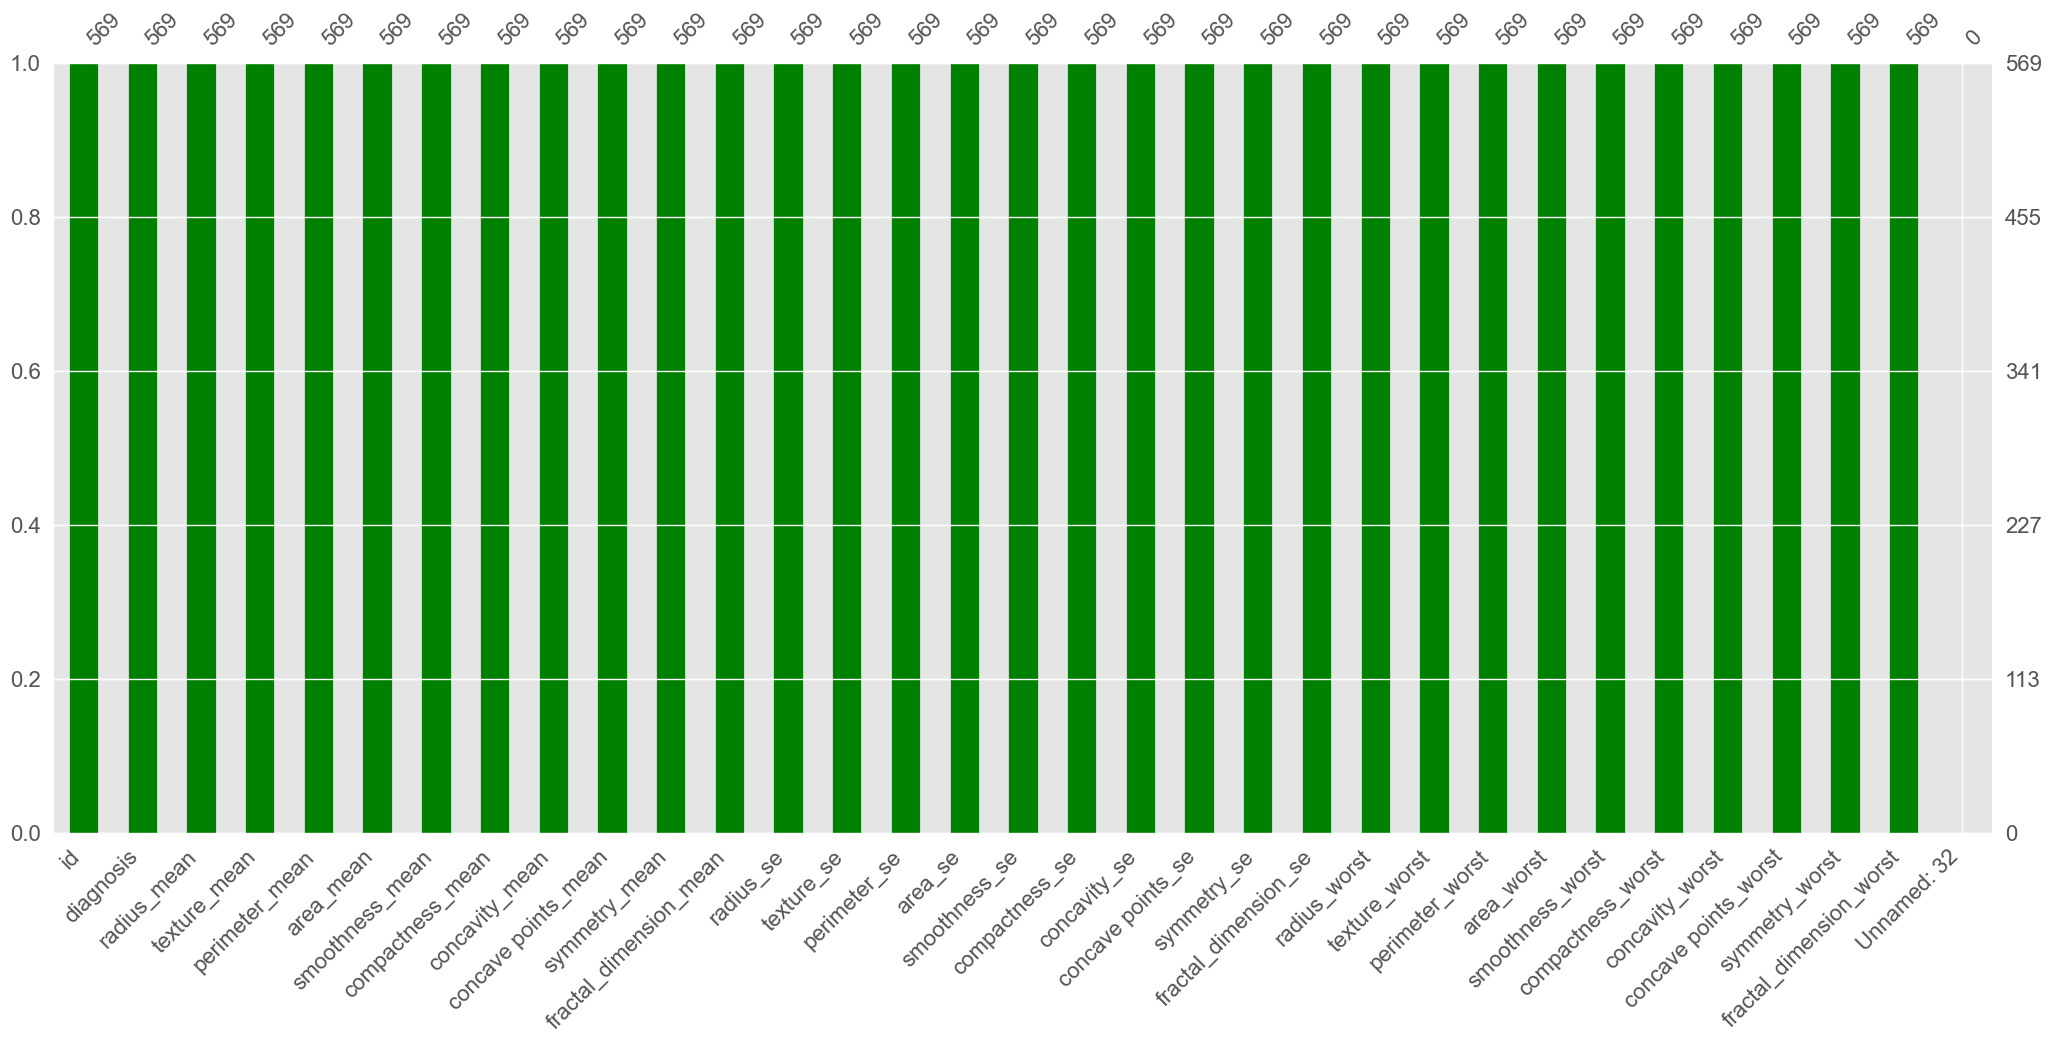

In [101]:
msno.bar(df,color="green")

In [102]:
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

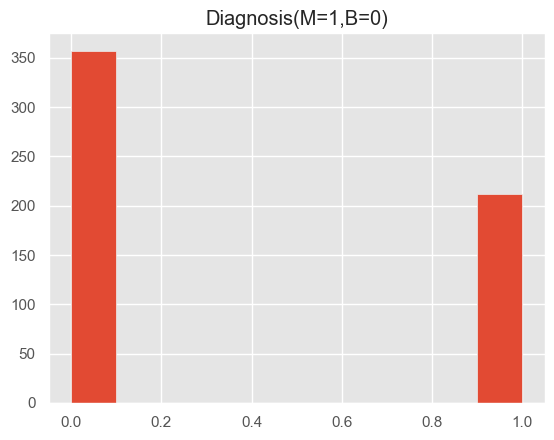

In [103]:
#there is no missing value
plt.hist(df['diagnosis'])
plt.title('Diagnosis(M=1,B=0)')
plt.show()

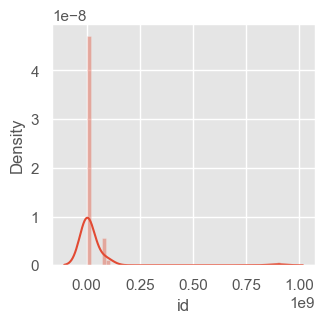

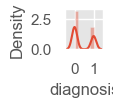

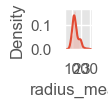

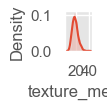

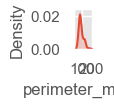

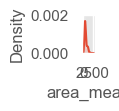

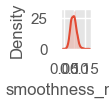

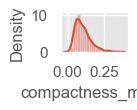

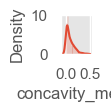

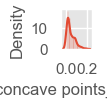

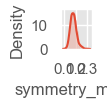

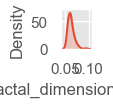

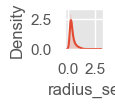

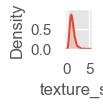

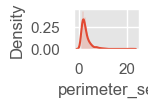

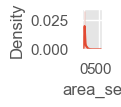

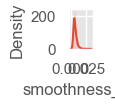

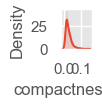

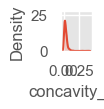

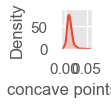

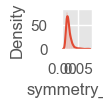

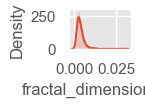

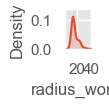

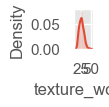

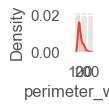

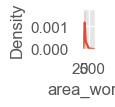

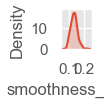

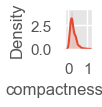

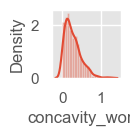

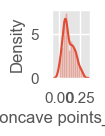

In [104]:
#each 5 row its having 6 columns
#EDA
#density graph
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax =plt.subplot(5,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        plotnumber+=1

        plt.tight_layout()
        plt.show()


In [105]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


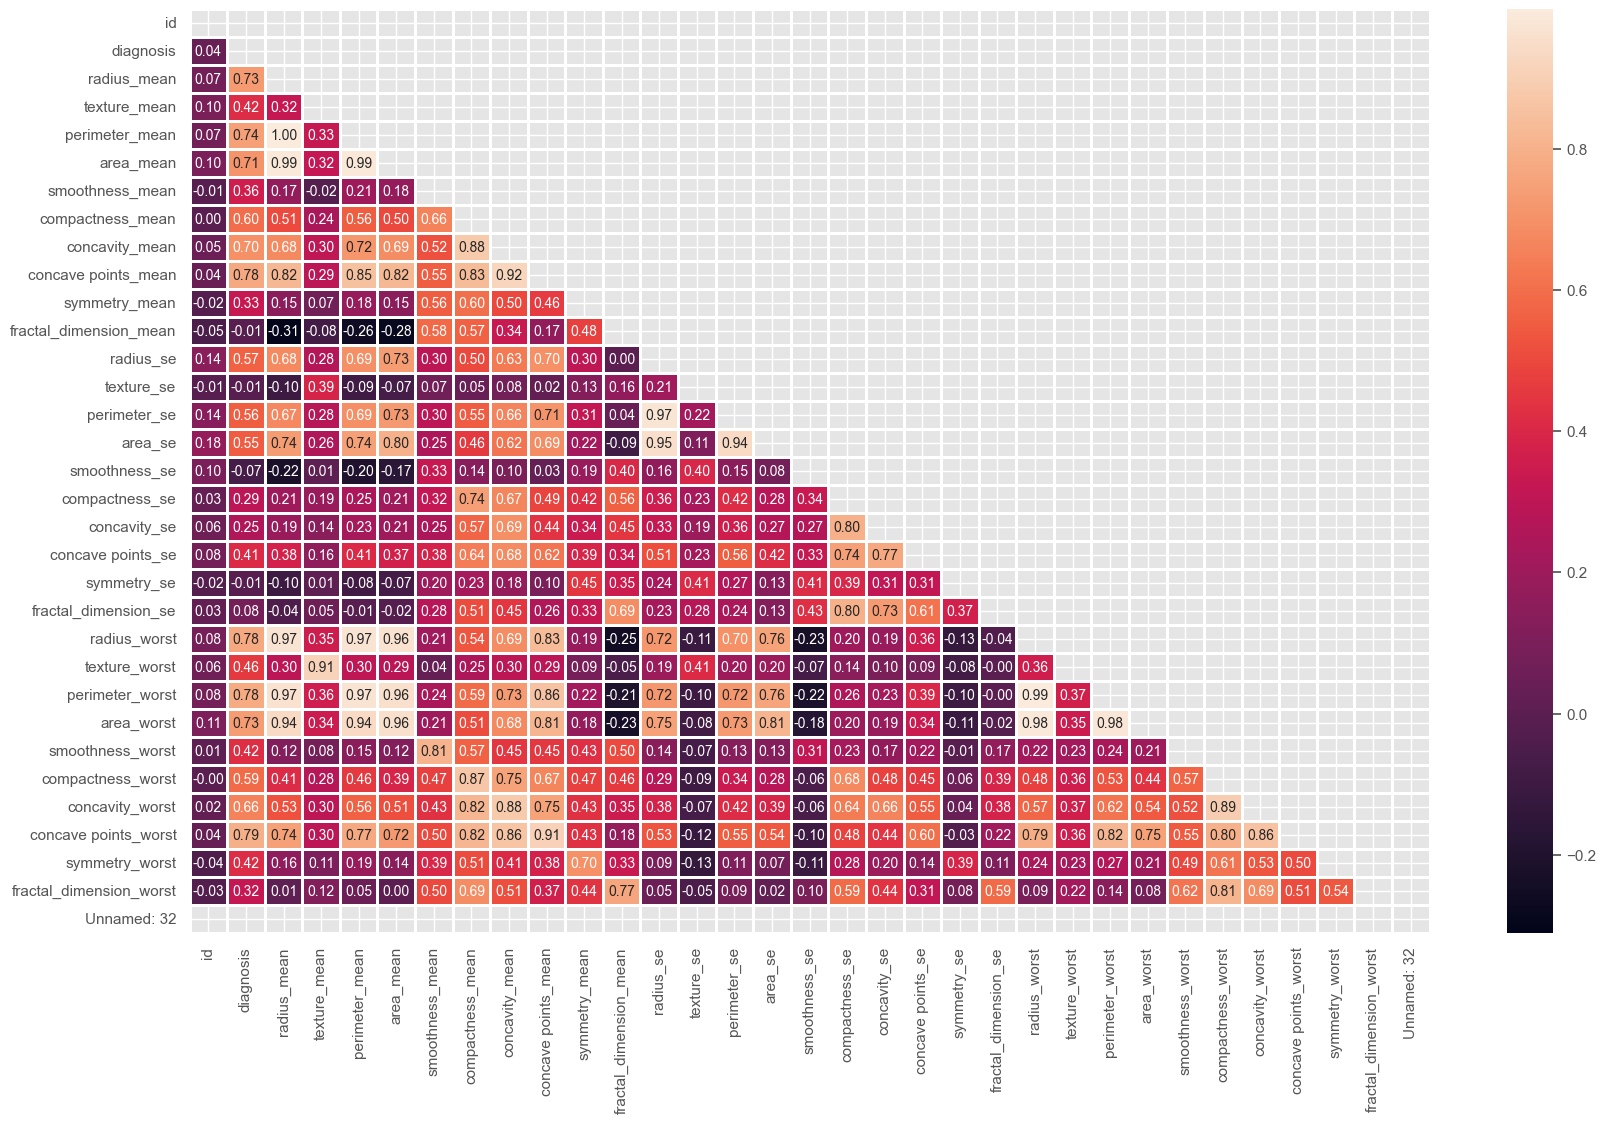

In [106]:
#heatmap
plt.figure(figsize=(20,12))
corr =df.corr()
mask=np.triu(np.ones_like(corr , dtype=bool))

sns.heatmap(corr,mask=mask,linewidths=1,annot=True,fmt=".2f")
plt.show()

In [107]:
df.drop('id',axis=1,inplace=True)

In [109]:
#highly correlated feature
#multicolinearity
#feature selection
import pandas as pd
import numpy as np

# Assuming df is already defined as a pandas DataFrame
corr_matrix = df.corr().abs()  # Compute the absolute correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
tri_df = corr_matrix.mask(mask)  # Apply the mask to hide the upper triangle

# Identify columns to drop based on the threshold (e.g., > 0.92 correlation)
to_drop = [col for col in tri_df.columns if any(tri_df[col] > 0.92)]

# Drop the highly correlated columns
df = df.drop(to_drop, axis=1)

# Print the number of remaining columns
print(df.shape[1])




24


In [110]:
# Save the SVM model
# import pickle
# model = SVM  # SVM model
# pickle.dump(model, open('breast_cancer.pkl', 'wb'))

# # Also save the scaler since we'll need it for preprocessing new data
# pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [111]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [112]:
#23 features reduce it 23 now
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train ,y_test =train_test_split(X,y, test_size=0.2,random_state=0)


In [114]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_tets = scaler.transform(X_test)


In [115]:
X_train.shape

(455, 23)

In [116]:
#apply machine learning algorithm

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Handle missing values in X_train
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean
X_train = imputer.fit_transform(X_train)


In [117]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)
# y_pred = log_reg.predict(X_test)



In [118]:
# 1. First, properly prepare the data
df = pd.read_csv("data1.csv")

# Drop the unnamed column and id column since they're not needed
df = df.drop(['Unnamed: 32', 'id'], axis=1, errors='ignore')

# Convert diagnosis to numeric (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Handle missing values before splitting
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you can train your model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [124]:
# 1. First handle missing values properly
# ... existing imports ...
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Handle missing values in both training and test sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Note: use transform, not fit_transform on test data

# 2. Then train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# 3. Now you can evaluate the model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [125]:
y_pred=log_reg.predict(X_test)



In [126]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_train, log_reg.predict(X_train))

print(log_reg_acc)
y_pred=log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



0.9868131868131869
0.9868131868131869
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [128]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
        



KNeighborsClassifier()

In [129]:
y_pred + knn.predict(X_test)

y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_train, knn.predict(X_train))

print(knn_acc)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9802197802197802
0.9802197802197802
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [131]:
# SVM
#HYPERPARAMETER TUNING
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma' : [0.0001,0.001, 0.01, 0.1],
    'C':[0.1, 0.05,0.5,0.1,1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [132]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [133]:
grid_search.best_score_

0.9758241758241759

In [134]:
svc = SVC(C=15 , gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [135]:
y_pred = svc.predict(X_test)

In [136]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_train, svc.predict(X_train))

print(svc_acc)
y_pred=svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9934065934065934
0.9934065934065934
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [138]:
#DT
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {

    'criterion': ['gini', 'entropy'] ,
     'max_depth':range(2,32,1),
     'min_samples_leaf':range(1,10,1),
     'min_samples_split':range(2,10,1),
     'splitter':['best','random']             
}

grid_search_dt= GridSearchCV(dtc,parameters,cv=5,n_jobs=-1,verbose=1)
grid_search_dt.fit(X_train,y_train)


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [139]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

In [140]:
grid_search_dt.best_score_

0.9648351648351647

In [141]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth=15, min_samples_leaf=4,min_samples_split=5, splitter = 'random')

In [142]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_train, dtc.predict(X_train))

print(dtc_acc)
y_pred=dtc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9692307692307692
0.9692307692307692
[[69  2]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [144]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion='entropy' , max_depth= 10, max_features= 0.5, min_samples_leaf=2,min_samples_split=3,n_estimators=130)
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [145]:
y_pred = rand_clf.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_train, rand_clf.predict(X_train))

print(rand_clf_acc)
y_pred=rand_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9956043956043956
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [147]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
parameters = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate':[0.001,0.1],
    'n_estimators':[100, 150,180]
}

grid_search_gbc = GridSearchCV(gbc,parameters,cv= 2, n_jobs = -5 , verbose = 1)
grid_search_gbc.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [148]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [149]:
grid_search_gbc.best_score_

0.9472138496019785

In [150]:
gbc = GradientBoostingClassifier(learning_rate = 0.1,loss ='exponential' , n_estimators=180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_train, gbc.predict(X_train))

print(gbc_acc)
y_pred=gbc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
1.0
[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [152]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5,n_estimators = 180)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [154]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN','SVM','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','XGBoost'],
    'Score' : [100*round(log_reg_acc,4),100*round(knn_acc,4),100*round(svc_acc,4),100*round(dtc_acc,4), 100*round(rand_clf_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score',ascending = False)

,Model,Score
5,Gradient Boosting Classifier,100.00
4,Random Forest Classifier,99.56
2,SVM,99.34
0,Logistic Regression,98.68
1,KNN,98.02
3,Decision Tree Classifier,96.92
6,XGBoost,96.49


In [155]:
import pickle
model = svc
pickle.dump(model,open("breast_cancer.pkl","wb"))

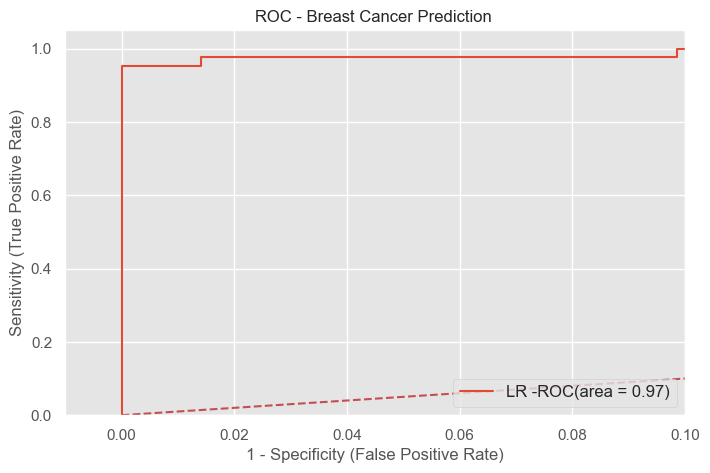

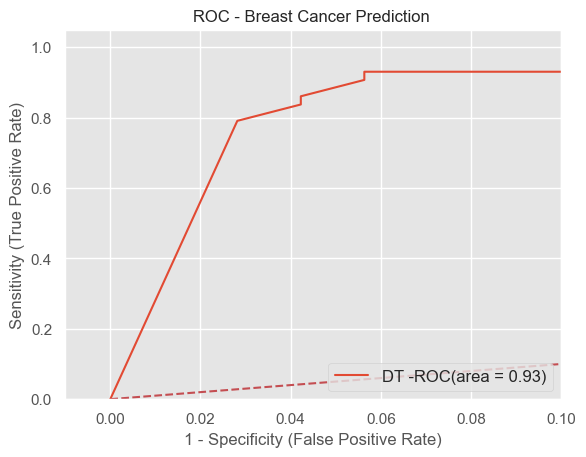

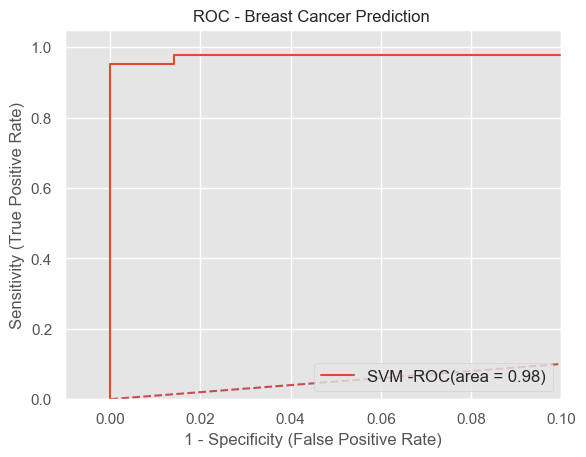

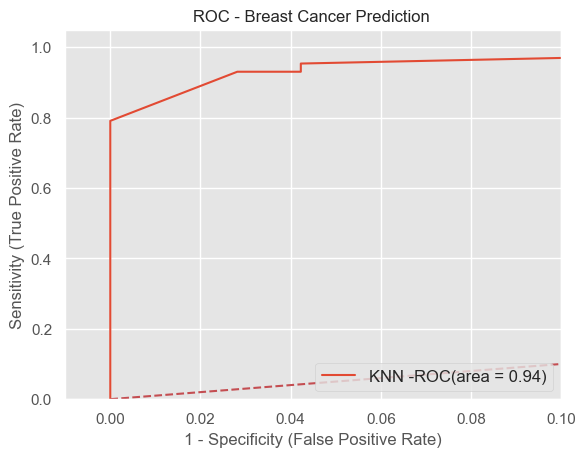

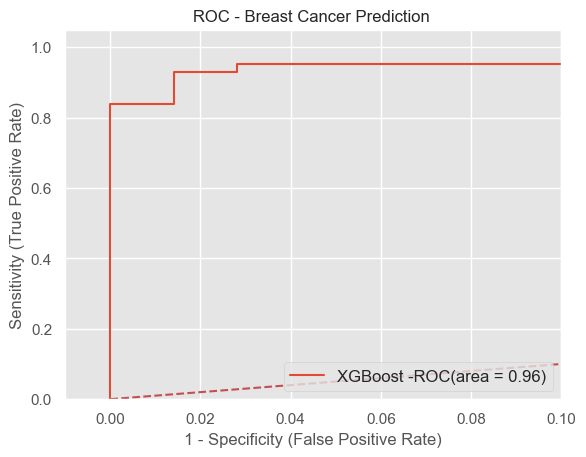

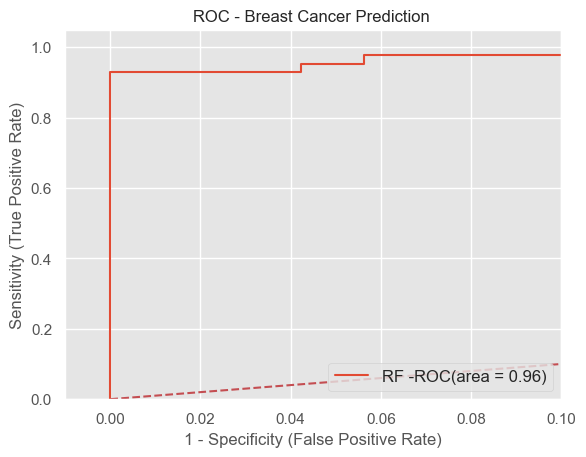

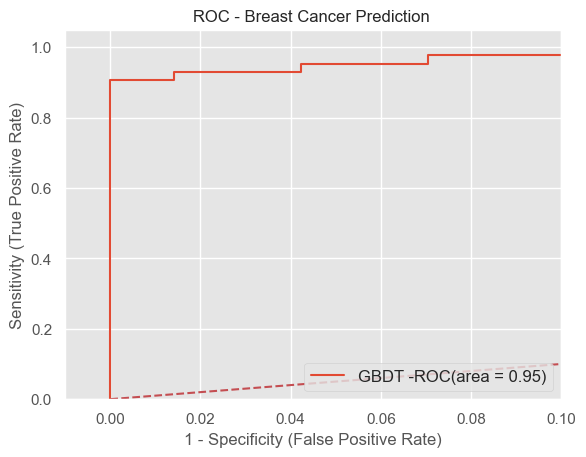

In [156]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [ 
    {
    'label':'LR',
    'model': log_reg,
},
{
    'label':'DT',
    'model': dtc,
},
{
    'label':'SVM',
    'model': svc,
},
{
    'label':'KNN',
    'model':knn,
},
{
    'label':'XGBoost',
    'model':xgb
},
{
    'label':'RF',
    'model':rand_clf,
},
{
    'label':'GBDT',
    'model': gbc,
}
]

for m in models:
    model = m['model']
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1,label='%s -ROC(area = %0.2f)' %(m['label'],auc)) 


    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,0.1])
    plt.ylim([0.0,1.05])
    plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=12)
    plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
    plt.title('ROC - Breast Cancer Prediction ', fontsize=12)
    plt.legend(loc="lower right", fontsize=12)
    plt.savefig("roc_breast_cancer.jpeg", format= 'jpeg',dpi=400,bbox_inches='tight')
    plt.show()

In [167]:
# from sklearn import metrics
# import numpy as np
# import matplotlib.pyplot as plt

# models =[
#     {
#     'label':'LR',
#     'model': log_reg,
# },
# {
#     'label':'DT',
#     'model': dtc,
# },
# {
#     'label':'SVM',
#     'model': svc,
# },
# {
#     'label':'KNN',
#     'model':knn,
# },
# {
#     'label':'XGBoost',
#     'model':xgb
# },
# {
#     'label':'RF',
#     'model':rand_clf,
# },
# { 'label':'GBDT',
#     'model': gbc,
# }
# ]

# means_roc = []
# means_accuracy = [100*round(log_reg_acc,4),100*round(dtc_acc,4),100*round(svc_acc,4),100*round(knn_acc,4),100*round(xgb_acc,4),100*round(rand_clf_acc,4),100*round(gbc_acc,4)]

# for m in models:
#     model = m['model']
#     model.fit(X_train,y_train)
#     y_pred=model.predict(X_train)
#     fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
#     auc = metrics.roc_auc_score(y_test,model.predict(X_test))
#     auc = 100*round(auc,4)
#     means_roc.append(auc)

#     print(means_accuracy)
#     print(means_roc)

#     #data to  plot

#     n_group = 7
#     means_accuracy= tuple(means_accuracy)
#     means_roc= tuple(means_roc)

#     #create plot
#     fig,ax = plt.subplot(figsize=(8,5))
#     index=np.arange(n_group)
#     bar_width = 0.35
#     opacity=0.8


#     reacts1 = plt.bar(index,means_accuracy, bar_width, aplha= opacity, color='mediumpurple', label='accuracy(%)')
#     reacts2 = plt.bar(index+bar_width, means_roc, bar_width, aplha= opacity, color='rebeccapurple', label='ROC (%)')


#     plt.xlim([-1,8])
#     plt.ylim([70,104])

#     plt.title('Performance Evaluation - Breast Cancer Prediction',fontsize=12)

#     plt.xticks(index ('  LR','DT' , ' SVM', ' KNN' , '  XGBoost',' RF', 'GBDT'), rotation =40,)
#     plt.legend(loc="upper right",fontsize=10)
#     plt.savefig("PE_breast_cancer.jpeg",format='jpeg',dpi=400, bbox_inches='tight')
#     plt.show()





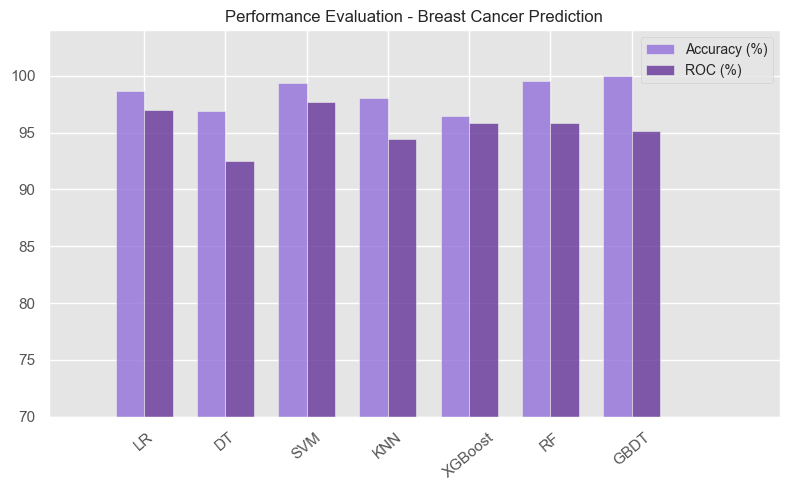

In [157]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# First, ensure all models are defined and fitted before this code block
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc}
]

means_roc = []
means_accuracy = [
    100*round(log_reg_acc, 4),
    100*round(dtc_acc, 4),
    100*round(svc_acc, 4),
    100*round(knn_acc, 4),
    100*round(xgb_acc, 4),
    100*round(rand_clf_acc, 4),
    100*round(gbc_acc, 4)
]

# Calculate ROC scores
for m in models:
    model = m['model']
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    auc = 100*round(auc, 4)
    means_roc.append(auc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])
plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)

# Fix xticks
plt.xticks(index + bar_width/2, ['LR', 'DT', 'SVM', 'KNN', 'XGBoost', 'RF', 'GBDT'], rotation=40)
plt.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

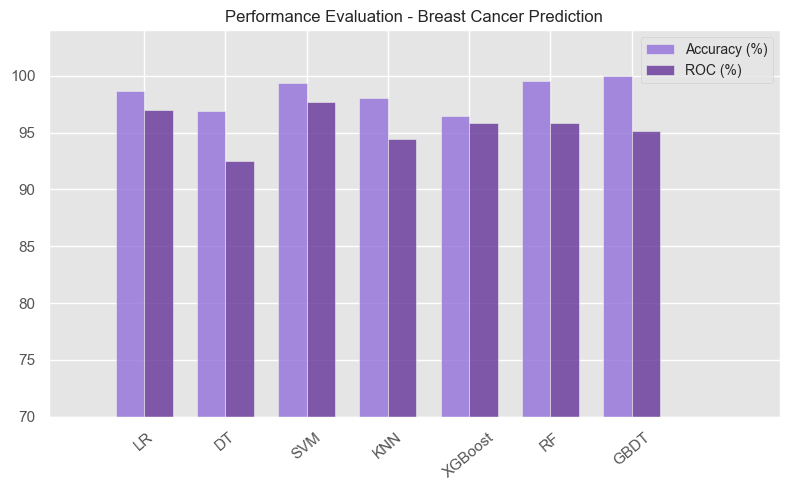

In [158]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# First, ensure all models are defined and fitted before this code block
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc}
]

means_roc = []
means_accuracy = [
    100*round(log_reg_acc, 4),
    100*round(dtc_acc, 4),
    100*round(svc_acc, 4),
    100*round(knn_acc, 4),
    100*round(xgb_acc, 4),
    100*round(rand_clf_acc, 4),
    100*round(gbc_acc, 4)
]

# Calculate ROC scores
for m in models:
    model = m['model']
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    auc = 100*round(auc, 4)
    means_roc.append(auc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])
plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)

# Fix xticks
plt.xticks(index + bar_width/2, ['LR', 'DT', 'SVM', 'KNN', 'XGBoost', 'RF', 'GBDT'], rotation=40)
plt.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

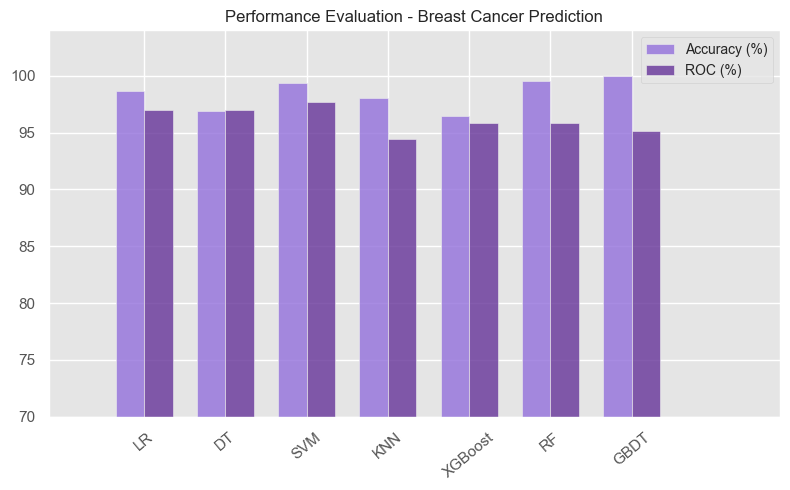

In [159]:
# 1. First redefine and train all models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_acc = accuracy_score(y_train, log_reg.predict(X_train))

# Decision Tree
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter='random')
dtc.fit(X_train, y_train)
dtc_acc = accuracy_score(y_train, dtc.predict(X_train))

# SVM
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)
svc_acc = accuracy_score(y_train, svc.predict(X_train))

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_train, knn.predict(X_train))

# XGBoost
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=5, n_estimators=180)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

# Random Forest
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rand_clf.fit(X_train, y_train)
rand_clf_acc = accuracy_score(y_train, rand_clf.predict(X_train))

# Gradient Boosting
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=180)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_train, gbc.predict(X_train))

# 2. Now create the visualization
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc}
]

means_roc = []
means_accuracy = [
    100*round(log_reg_acc, 4),
    100*round(dtc_acc, 4),
    100*round(svc_acc, 4),
    100*round(knn_acc, 4),
    100*round(xgb_acc, 4),
    100*round(rand_clf_acc, 4),
    100*round(gbc_acc, 4)
]

# Calculate ROC scores
for m in models:
    model = m['model']
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    auc = 100*round(auc, 4)
    means_roc.append(auc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(len(models))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 104])
plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index + bar_width/2, ['LR', 'DT', 'SVM', 'KNN', 'XGBoost', 'RF', 'GBDT'], rotation=40)
plt.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [177]:
# def predict_cancer(input_data):
#     # Define the feature names in the correct order
#     features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
#                 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
#                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
#                 'smoothness_se', 'compactness_se', 'concavity_se', 
#                 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
#                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
    
#     # Convert input to numpy array and reshape
#     input_array = np.array(input_data).reshape(1, -1)
    
#     # Apply the same preprocessing as training data
#     input_processed = scaler.transform(input_array)
    
#     # Make prediction
#     prediction = model.predict(input_processed)
#     probability = model.predict_proba(input_processed)
    
#     return {
#         'prediction': 'Malignant' if prediction[0] == 1 else 'Benign',
#         'probability': probability[0][1]  # Probability of being malignant
#     }

# # Example usage:
# sample_input = [
#     17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
#     1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
#     25.38, 17.33, 184.6, 2019.0
# ]

# result = predict_cancer(sample_input)
# print(f"Diagnosis: {result['prediction']}")
# print(f"Probability of being malignant: {result['probability']:.2%}")

In [160]:
# Print the feature names and count from your training data
print("Number of features in training data:", len(X.columns))
print("\nFeature names:")
for i, col in enumerate(X.columns, 1):
    print(f"{i}. {col}")

# Now modify the prediction function to match these exact features
def predict_cancer(input_data):
    # Get the exact feature names from your training data
    features = list(X.columns)
    
    # Verify input length matches expected features
    if len(input_data) != len(features):
        raise ValueError(f"Expected {len(features)} features but got {len(input_data)}. Please provide all required features.")
    
    # Create a DataFrame with the input data using the correct feature names
    input_df = pd.DataFrame([input_data], columns=features)
    
    # Apply the same preprocessing as training data
    input_processed = scaler.transform(input_df)
    
    # Make prediction
    prediction = model.predict(input_processed)
    probability = model.predict_proba(input_processed)
    
    return {
        'prediction': 'Malignant' if prediction[0] == 1 else 'Benign',
        'probability': probability[0][1]  # Probability of being malignant
    }

# Example usage with the correct number of features
# You'll need to provide all 30 features in the correct order
sample_input = [
    # Add all 30 values here in the same order as the features printed above
    # For example:
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

try:
    result = predict_cancer(sample_input)
    print(f"Diagnosis: {result['prediction']}")
    print(f"Probability of being malignant: {result['probability']:.2%}")
except ValueError as e:
    print(f"Error: {e}")

Number of features in training data: 30

Feature names:
1. radius_mean
2. texture_mean
3. perimeter_mean
4. area_mean
5. smoothness_mean
6. compactness_mean
7. concavity_mean
8. concave points_mean
9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst
Diagnosis: Malignant
Probability of being malignant: 100.00%


In [162]:
# In your Jupyter notebook where you# In your notebook where you trained the model
import pickle

# Save the model
pickle.dump(svc, open('breast_cancer.pkl', 'wb'))

# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))